                        SampleID  # Reads
0     UWA7648_CX17_A38_1_P3-1-O5     8320
1    UWA7648_CX17_A38_1_P8-1-I15     8089
2    UWA7648_CX17_A38_1_P7-1-A11     7817
3     UWA7648_CX17_A38_1_P4-1-C7     7489
4     UWA7648_CX17_A38_1_P6-1-M9     6863
5    UWA7648_CX17_A38_2_P14-1-I2     6828
6     UWA7648_CX17_A38_1_P5-1-K9     6316
7   UWA7648_CX17_A38_2_P15-1-C10     6138
8   UWA7648_CX17_A38_2_P12-1-O21     5777
9   UWA7648_CX17_A38_2_P13-1-C23     5776
10    UWA7648_CX17_A38_1_P1-1-I3     5726
11  UWA7648_CX17_A38_2_P16-1-G10     5613
12  UWA7648_CX17_A38_2_P10-1-M17     5445
13   UWA7648_CX17_A38_1_P9-1-K15     5422
14  UWA7648_CX17_A38_2_P11-1-C21     5330
15    UWA7648_CX17_A38_1_P2-1-E5     5218
16                Total Reads PF   102167


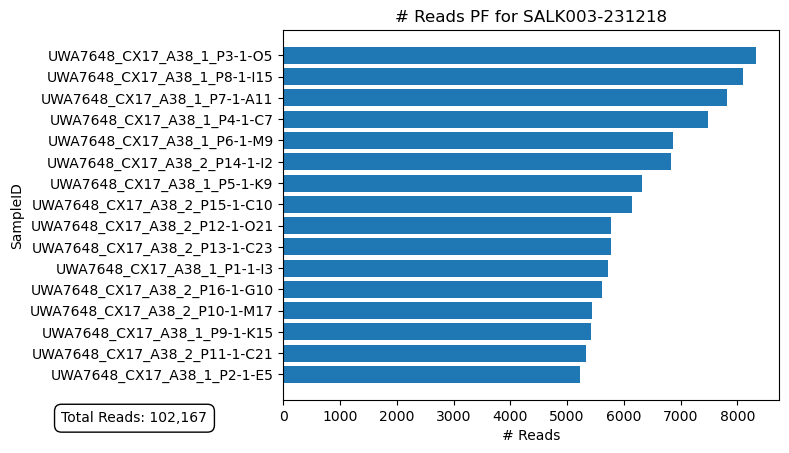

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from itertools import takewhile
from io import StringIO

def generate_reads_pf_chart(run_folder, pool):
    # Run Directory path
    run_path = f"/gale/netapp/seq2/illumina_runs/{run_folder}"

    # Specify the file path
    file_path = run_path + "/Reports/Demultiplex_Stats.csv"

    output_parent = "/gale/netapp/seq11/illumina_runs/bclconvert_scripts/pf"

    output_path = f"{output_parent}/{pool}_reads_pf.png"

    # Define the stop condition
    stop_condition = lambda line: "[Top Unknown Barcodes]" not in line

    # Use a generator expression with takewhile to read lines until the stop condition is met
    with open(file_path, 'r') as file:
        lines_before_string = takewhile(stop_condition, file)

        # Create a pandas DataFrame from the collected lines
        df = pd.read_csv(StringIO(''.join(lines_before_string)))

    # Summing up the "# Reads" for each "SampleID"
    summed_df = df.groupby('SampleID')['# Reads'].sum().reset_index()

    # Exclude the row with SampleID "Undetermined"
    filtered_summed_df = summed_df[summed_df['SampleID'] != 'Undetermined']

    # Sort the DataFrame by '# Reads' in descending order
    sorted_summed_df = filtered_summed_df.sort_values(by='# Reads', ascending=False)

    # Sum up the "# Reads" column to get total_reads
    total_reads = sorted_summed_df['# Reads'].sum()

    # Create a new row for "Total Reads PF" in the DataFrame
    total_reads_row = pd.DataFrame({'SampleID': ['Total Reads PF'], '# Reads': [total_reads]})

    # Append the new row to the DataFrame
    sorted_summed_df = pd.concat([sorted_summed_df, total_reads_row], ignore_index=True)

    # Sort the DataFrame by '# Reads' in descending order and reverse the order
    print(sorted_summed_df)
    sorted_summed_df = sorted_summed_df[::-1]

    # Exclude the row with SampleID "Total Reads PF" from the DataFrame
    sorted_summed_df = sorted_summed_df[sorted_summed_df['SampleID'] != 'Total Reads PF']

    # Create a horizontal bar chart with # Reads on the Y-axis
    plt.barh(sorted_summed_df['SampleID'], sorted_summed_df['# Reads'])
    plt.xlabel('# Reads')
    plt.ylabel('SampleID')
    plt.title(f'# Reads PF for {pool}')

    # Format total_reads with commas
    total_reads = '{:,}'.format(total_reads)

    # Add text annotation for total reads with a box around it
    plt.text(-0.3, -0.05, f'Total Reads: {total_reads}', ha='center', va='center', transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

    # Save the plot to a file
    plt.savefig(output_path, bbox_inches='tight')

    plt.show()

# Example usage:
run_folder = "231218_M00412_0757_000000000-GJ5F9_231219104457158934631"
pool = "SALK003-231218"
generate_reads_pf_chart(run_folder, pool)


                        SampleID  # Reads
0    UWA7648_CX14_A45_2_P14-1-F6     7085
1     UWA7648_CX14_A45_1_P6-1-I2     6828
2   UWA7648_CX14_A45_2_P10-1-J11     6424
3    UWA7648_CX14_A45_2_P16-1-D8     6350
4    UWA7648_CX14_A45_1_P7-1-C10     6138
5    UWA7648_CX14_A45_2_P15-1-H6     6085
6    UWA7648_CX14_A45_2_P9-1-B11     5895
7    UWA7648_CX14_A45_2_P11-1-J2     5879
8    UWA7648_CX14_A45_2_P12-1-B6     5809
9    UWA7648_CX14_A45_1_P4-1-O21     5777
10   UWA7648_CX14_A45_1_P5-1-C23     5776
11   UWA7648_CX14_A45_1_P8-1-G10     5613
12   UWA7648_CX14_A45_2_P13-1-D6     5480
13   UWA7648_CX14_A45_1_P2-1-M17     5445
14   UWA7648_CX14_A45_1_P1-1-K15     5422
15   UWA7648_CX14_A45_1_P3-1-C21     5330
16                Total Reads PF    95336


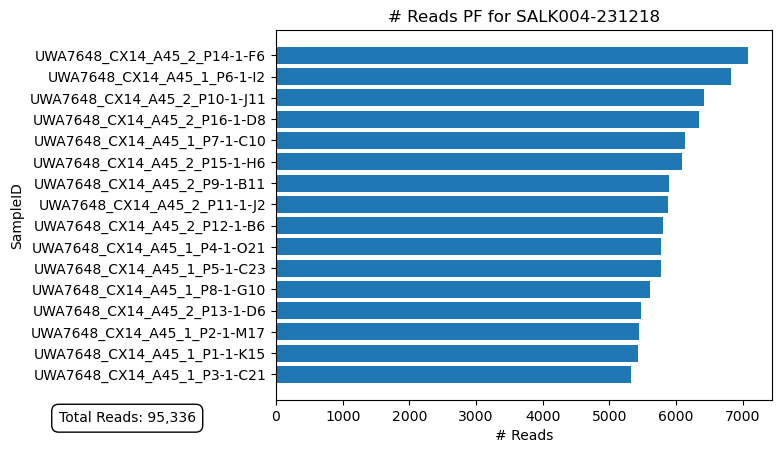

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from itertools import takewhile
from io import StringIO

def generate_reads_pf_chart(run_folder, pool):
    # Run Directory path
    run_path = f"/gale/netapp/seq2/illumina_runs/{run_folder}"

    # Specify the file path
    file_path = run_path + "/Reports/Demultiplex_Stats.csv"

    output_parent = "/gale/netapp/seq11/illumina_runs/bclconvert_scripts/pf"

    output_path = f"{output_parent}/{pool}_reads_pf.png"

    # Define the stop condition
    stop_condition = lambda line: "[Top Unknown Barcodes]" not in line

    # Use a generator expression with takewhile to read lines until the stop condition is met
    with open(file_path, 'r') as file:
        lines_before_string = takewhile(stop_condition, file)

        # Create a pandas DataFrame from the collected lines
        df = pd.read_csv(StringIO(''.join(lines_before_string)))

    # Summing up the "# Reads" for each "SampleID"
    summed_df = df.groupby('SampleID')['# Reads'].sum().reset_index()

    # Exclude the row with SampleID "Undetermined"
    filtered_summed_df = summed_df[summed_df['SampleID'] != 'Undetermined']

    # Sort the DataFrame by '# Reads' in descending order
    sorted_summed_df = filtered_summed_df.sort_values(by='# Reads', ascending=False)

    # Sum up the "# Reads" column to get total_reads
    total_reads = sorted_summed_df['# Reads'].sum()

    # Create a new row for "Total Reads PF" in the DataFrame
    total_reads_row = pd.DataFrame({'SampleID': ['Total Reads PF'], '# Reads': [total_reads]})

    # Append the new row to the DataFrame
    sorted_summed_df = pd.concat([sorted_summed_df, total_reads_row], ignore_index=True)

    # Sort the DataFrame by '# Reads' in descending order and reverse the order
    print(sorted_summed_df)
    sorted_summed_df = sorted_summed_df[::-1]

    # Exclude the row with SampleID "Total Reads PF" from the DataFrame
    sorted_summed_df = sorted_summed_df[sorted_summed_df['SampleID'] != 'Total Reads PF']

    # Create a horizontal bar chart with # Reads on the Y-axis
    plt.barh(sorted_summed_df['SampleID'], sorted_summed_df['# Reads'])
    plt.xlabel('# Reads')
    plt.ylabel('SampleID')
    plt.title(f'# Reads PF for {pool}')

    # Format total_reads with commas
    total_reads = '{:,}'.format(total_reads)

    # Add text annotation for total reads with a box around it
    plt.text(-0.3, -0.05, f'Total Reads: {total_reads}', ha='center', va='center', transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

    # Save the plot to a file
    plt.savefig(output_path, bbox_inches='tight')

    plt.show()

# Example usage:
run_folder = "231218_M00412_0757_000000000-GJ5F9_231219104459126691713"
pool = "SALK004-231218"
generate_reads_pf_chart(run_folder, pool)


                           SampleID  # Reads
0   UWA7648_CX242526_Ig_1_P11-1-F21    11800
1    UWA7648_CX242526_Ig_1_P13-1-E8    11788
2    UWA7648_CX242526_Ig_1_P8-1-F12    11690
3    UWA7648_CX242526_Ig_1_P9-1-F19    11432
4   UWA7648_CX242526_Ig_1_P16-1-C18    11093
5   UWA7648_CX242526_Ig_1_P14-1-K11    10600
6     UWA7648_CX242526_Ig_1_P2-1-A6     9798
7   UWA7648_CX242526_Ig_1_P10-1-E21     9779
8    UWA7648_CX242526_Ig_1_P5-1-P21     9766
9   UWA7648_CX242526_Ig_1_P15-1-K21     9624
10   UWA7648_CX242526_Ig_1_P4-1-B23     9224
11   UWA7648_CX242526_Ig_1_P1-1-J12     8841
12    UWA7648_CX242526_Ig_1_P6-1-G5     8834
13   UWA7648_CX242526_Ig_1_P7-1-N22     7790
14  UWA7648_CX242526_Ig_1_P12-1-P11     7667
15    UWA7648_CX242526_Ig_1_P3-1-F8     6263
16                   Total Reads PF   155989


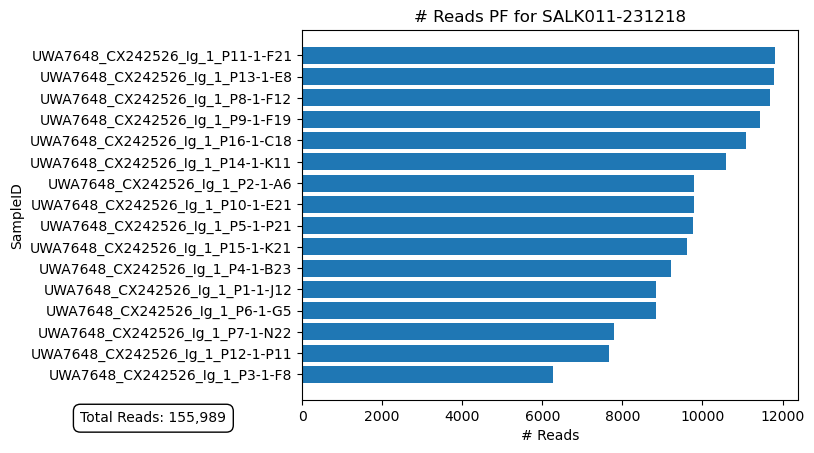

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from itertools import takewhile
from io import StringIO

def generate_reads_pf_chart(run_folder, pool):
    # Run Directory path
    run_path = f"/gale/netapp/seq2/illumina_runs/{run_folder}"

    # Specify the file path
    file_path = run_path + "/Reports/Demultiplex_Stats.csv"

    output_parent = "/gale/netapp/seq11/illumina_runs/bclconvert_scripts/pf"

    output_path = f"{output_parent}/{pool}_reads_pf.png"

    # Define the stop condition
    stop_condition = lambda line: "[Top Unknown Barcodes]" not in line

    # Use a generator expression with takewhile to read lines until the stop condition is met
    with open(file_path, 'r') as file:
        lines_before_string = takewhile(stop_condition, file)

        # Create a pandas DataFrame from the collected lines
        df = pd.read_csv(StringIO(''.join(lines_before_string)))

    # Summing up the "# Reads" for each "SampleID"
    summed_df = df.groupby('SampleID')['# Reads'].sum().reset_index()

    # Exclude the row with SampleID "Undetermined"
    filtered_summed_df = summed_df[summed_df['SampleID'] != 'Undetermined']

    # Sort the DataFrame by '# Reads' in descending order
    sorted_summed_df = filtered_summed_df.sort_values(by='# Reads', ascending=False)

    # Sum up the "# Reads" column to get total_reads
    total_reads = sorted_summed_df['# Reads'].sum()

    # Create a new row for "Total Reads PF" in the DataFrame
    total_reads_row = pd.DataFrame({'SampleID': ['Total Reads PF'], '# Reads': [total_reads]})

    # Append the new row to the DataFrame
    sorted_summed_df = pd.concat([sorted_summed_df, total_reads_row], ignore_index=True)

    # Sort the DataFrame by '# Reads' in descending order and reverse the order
    print(sorted_summed_df)
    sorted_summed_df = sorted_summed_df[::-1]

    # Exclude the row with SampleID "Total Reads PF" from the DataFrame
    sorted_summed_df = sorted_summed_df[sorted_summed_df['SampleID'] != 'Total Reads PF']

    # Create a horizontal bar chart with # Reads on the Y-axis
    plt.barh(sorted_summed_df['SampleID'], sorted_summed_df['# Reads'])
    plt.xlabel('# Reads')
    plt.ylabel('SampleID')
    plt.title(f'# Reads PF for {pool}')

    # Format total_reads with commas
    total_reads = '{:,}'.format(total_reads)

    # Add text annotation for total reads with a box around it
    plt.text(-0.3, -0.05, f'Total Reads: {total_reads}', ha='center', va='center', transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

    # Save the plot to a file
    plt.savefig(output_path, bbox_inches='tight')

    plt.show()

# Example usage:
run_folder = "231218_M00412_0757_000000000-GJ5F9_231219104500312060309"
pool = "SALK011-231218"
generate_reads_pf_chart(run_folder, pool)


                       SampleID  # Reads
0     UWA7648_CX29_A5_1_P4-1-E6    13414
1     UWA7648_CX29_A5_1_P3-1-F3    13042
2    UWA7648_CX29_A5_1_P11-1-E9     8894
3   UWA7648_CX29_A5_1_P10-1-I17     8340
4     UWA7648_CX29_A5_1_P9-1-G9     8332
5    UWA7648_CX29_A5_1_P14-1-P6     8084
6    UWA7648_CX29_A5_1_P6-1-A22     8013
7    UWA7648_CX29_A5_1_P7-1-B19     7671
8    UWA7648_CX29_A5_2_P15-1-O4     7236
9   UWA7648_CX29_A5_1_P13-1-J24     7174
10   UWA7648_CX29_A5_1_P5-1-G17     6785
11   UWA7648_CX29_A5_1_P12-1-N8     6675
12   UWA7648_CX29_A5_1_P2-1-P13     6544
13  UWA7648_CX29_A5_2_P16-1-J18     6147
14    UWA7648_CX29_A5_1_P1-1-I5     5742
15    UWA7648_CX29_A5_1_P8-1-A7     5594
16               Total Reads PF   127687


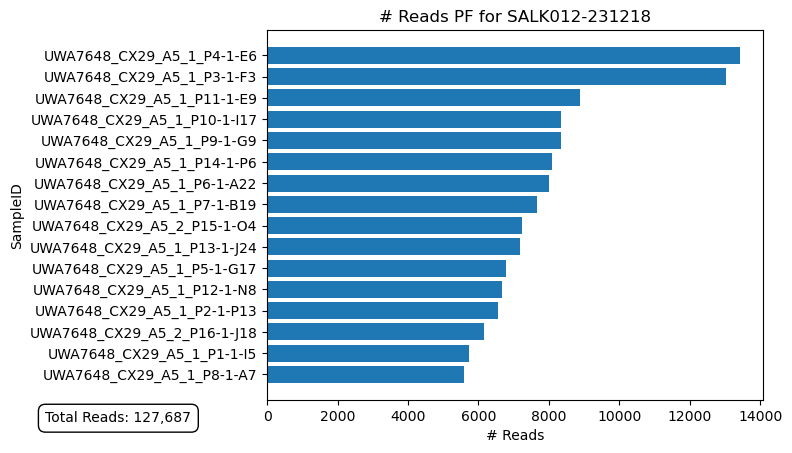

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from itertools import takewhile
from io import StringIO

def generate_reads_pf_chart(run_folder, pool):
    # Run Directory path
    run_path = f"/gale/netapp/seq2/illumina_runs/{run_folder}"

    # Specify the file path
    file_path = run_path + "/Reports/Demultiplex_Stats.csv"

    output_parent = "/gale/netapp/seq11/illumina_runs/bclconvert_scripts/pf"

    output_path = f"{output_parent}/{pool}_reads_pf.png"

    # Define the stop condition
    stop_condition = lambda line: "[Top Unknown Barcodes]" not in line

    # Use a generator expression with takewhile to read lines until the stop condition is met
    with open(file_path, 'r') as file:
        lines_before_string = takewhile(stop_condition, file)

        # Create a pandas DataFrame from the collected lines
        df = pd.read_csv(StringIO(''.join(lines_before_string)))

    # Summing up the "# Reads" for each "SampleID"
    summed_df = df.groupby('SampleID')['# Reads'].sum().reset_index()

    # Exclude the row with SampleID "Undetermined"
    filtered_summed_df = summed_df[summed_df['SampleID'] != 'Undetermined']

    # Sort the DataFrame by '# Reads' in descending order
    sorted_summed_df = filtered_summed_df.sort_values(by='# Reads', ascending=False)

    # Sum up the "# Reads" column to get total_reads
    total_reads = sorted_summed_df['# Reads'].sum()

    # Create a new row for "Total Reads PF" in the DataFrame
    total_reads_row = pd.DataFrame({'SampleID': ['Total Reads PF'], '# Reads': [total_reads]})

    # Append the new row to the DataFrame
    sorted_summed_df = pd.concat([sorted_summed_df, total_reads_row], ignore_index=True)

    # Sort the DataFrame by '# Reads' in descending order and reverse the order
    print(sorted_summed_df)
    sorted_summed_df = sorted_summed_df[::-1]

    # Exclude the row with SampleID "Total Reads PF" from the DataFrame
    sorted_summed_df = sorted_summed_df[sorted_summed_df['SampleID'] != 'Total Reads PF']

    # Create a horizontal bar chart with # Reads on the Y-axis
    plt.barh(sorted_summed_df['SampleID'], sorted_summed_df['# Reads'])
    plt.xlabel('# Reads')
    plt.ylabel('SampleID')
    plt.title(f'# Reads PF for {pool}')

    # Format total_reads with commas
    total_reads = '{:,}'.format(total_reads)

    # Add text annotation for total reads with a box around it
    plt.text(-0.3, -0.05, f'Total Reads: {total_reads}', ha='center', va='center', transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

    # Save the plot to a file
    plt.savefig(output_path, bbox_inches='tight')

    plt.show()

# Example usage:
run_folder = "231218_M00412_0757_000000000-GJ5F9_231219104501305480995"
pool = "SALK012-231218"
generate_reads_pf_chart(run_folder, pool)
